# Técnicas t-SNE y UMAP

## t-SNE
t-SNE (t-distributed stochastic neighbor embedding) es una técnica de reducción de dimensionalidad no lineal no supervisada muy adecuada para incorporar datos de alta dimensión para visualización en un espacio de baja dimensión de dos o tres dimensiones. Específicamente, modela cada objeto de alta dimensión por un punto bidimensional o tridimensional de tal manera que hay una alta probabilidad de que los objetos similares son modelados por puntos cercanos y objetos diferentes son modelados por puntos distantes.

#### El algoritmo t-SNE comprende dos etapas principales:

1. En primer lugar, t-SNE construye una distribución de probabilidad sobre pares de objetos de alta dimensión de tal manera que objetos similares tienen una alta probabilidad de ser escogidos, mientras que puntos diferentes tienen una probabilidad extremadamente pequeña de ser escogidos.
2. En segundo lugar, t-SNE define una distribución de probabilidad similar sobre los puntos en el mapa de baja dimensión, y minimiza la divergencia Kullback-Leibler entre las dos distribuciones con respecto a las ubicaciones de los puntos en el mapa. 

Si bien las gráficas de t-SNE a menudo parecen mostrar grupos, los grupos visuales pueden verse fuertemente influenciados por la parametrización elegida y, por lo tanto, es necesaria una buena comprensión de los parámetros para t-SNE. Se puede mostrar que tales "grupos" incluso aparecen en datos no agrupados y, por lo tanto, pueden ser hallazgos falsos. La exploración interactiva puede ser necesaria para elegir parámetros y validar resultados. Se ha demostrado que t-SNE a menudo es capaz de recuperar agrupaciones bien separadas, y con opciones de parámetros especiales, se aproxima a una forma simple de agrupación espectral

#### Aplicaciones
t-SNE es utilizada principalmente para la exploración de datos y la visualización de datos de alta dimensión. En términos más simples, t-SNE permite obtener una "sensación" o "intuición" de cómo se organizan los datos en un espacio de alta dimensión. Durante las etapas de exploración de los datos, esta observación es fundamental para conocer el dataset con el cual estamos trabajando.

Por ejemplo, t-SNE podría usarse para investigar, aprender o evaluar el agrupamiento de las muestras del dataset. Esto se puede usar antes de usar un modelo de Clustering para seleccionar el número esperado de clústers o después de ejecutar el modelo para evaluar si los grupos realmente se mantienen. t-SNE a menudo puede mostrar una separación clara en los datos.

t-SNE se ha utilizado para la visualización en una amplia gama de aplicaciones, en ellas la investigación de seguridad informática , análisis de música , investigación del cáncer , bioinformática , y procesamiento de señal biomédica. A menudo se usa para visualizar representaciones de alto nivel aprendidas por una red neuronal artificial.

### Limitaciones
* Es computacionalmente caro. Puede tomar horas datasets con millones de datos, mientras que en PCA tomaría minutos (o incluso segundos)
* Está limitado o a dos o tres incrustaciones dimensionales.
* El algoritmo es estocastico y multiples reinicios puede producir diferentes incrustaciones. Sin embargo, es perfectamente legítimo elegir la incrustación con el menor error.
* Requiere "tuneo" de hyperparámetros.

<u>Bibliografía</u>

* https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding 
* https://scikit-learn.org/stable/modules/manifold.html#t-sne
* https://sitiobigdata.com/2018/08/27/algoritmo-t-sne-con-python/#


---

# Aplicación de t-SNE

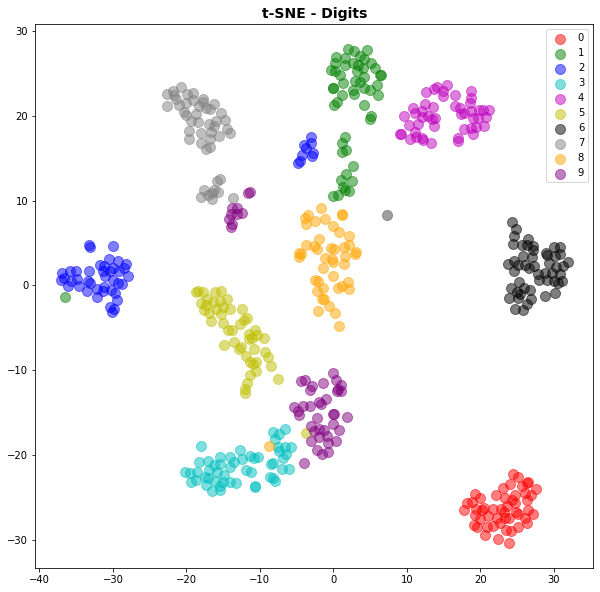

In [1]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Loading data
digits = load_digits()
# tomo solo los primeros 500 por motivos de visualizacion
X = digits.data[:500]
y = digits.target[:500]

# t-SNE
tsne = TSNE(n_components=2, random_state=0)
X = tsne.fit_transform(X)

# Visualizacion de los datos
target_ids = range(len(digits.target_names))
plt.figure(figsize=(10, 10))
colors = ('r', 'g', 'b', 'c', 'm', 'y', 'k', 'grey', 'orange', 'purple')
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=c, label=label, s=100, alpha=0.5)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('t-SNE - Digits', weight='bold').set_fontsize('14')
plt.show()


---

## UMAP
UMAP (Uniform Manifold Approximation and Projection) es un técnica de reducción de dimension que puede ser usada para visualización, de forma similar a t-SNE, pero también para *reducción de dimensión no lineal* general.
El algoritmo está basado en tres supuestos sobre los datos

1. Los datos son uniformemente distribuidos en una variedad de Reimannian; 
2. La metrica de Riemannian es localmente constante (o puede ser aproximada);
3. La variedad (el colector) está conectada localmente

A partir de estos supuestos, es posible modelar la variedad con una estructura topológica difusa. La incrustación se encuentra buscando una proyección de baja dimensión de los datos que tenga la estructura topológica difusa equivalente más cercana posible.

**Beneficios de UMAP:** Según su [documentación](https://pypi.org/project/umap-learn/) UMAP tiene algunas victorias significativas en su encarnación actual.

1. En primer lugar, UMAP es rápido. Puede manejar grandes conjuntos de datos y datos de alta dimensión sin demasiada dificultad, escalando más allá de lo que la mayoría de los paquetes t-SNE pueden administrar.
2. UMAP escala bien en la dimensión de incrustación, no es unicamente para visualización, sino que se puede usar como una técnica de reducción de dimensiones de propósito general como un paso preliminar para otras tareas de aprendizaje automático. Con un poco de cuidado (se acerca la documentación sobre cómo tener cuidado) se asocia bien con la biblioteca de agrupación de hdbscan. 
3. UMAP a menudo funciona mejor para preservar aspectos de la estructura global de los datos que t-SNE. Esto significa que a menudo puede proporcionar una mejor vista de "panorama general" de sus datos, así como preservar las relaciones con los vecinos locales.
4. UMAP admite una amplia variedad de funciones de distancia, incluidas las funciones de distancia no métricas, como la distancia cosenoidal y la distancia de correlación. ¡Finalmente puede incrustar vectores de palabras correctamente usando la distancia cosenoidal!
5. UMAP admite agregar nuevos puntos a una incrustación existente a través del método de transformación sklearn estándar. Esto significa que UMAP puede usarse como transformador de preprocesamiento en tuberías sklearn.
6. UMAP admite la reducción de dimensiones supervisadas y semi-supervisadas. Esto significa que si tiene información de etiqueta que desea utilizar como información adicional para la reducción de dimensiones (incluso si es solo un etiquetado parcial), puede hacerlo, tan simple como proporcionarla como parámetro $y$ en el método de ajuste.
7. Finalmente, UMAP tiene bases teóricas sólidas en el aprendizaje múltiple (vea nuestro artículo sobre ArXiv). Esto justifica el enfoque y permite extensiones adicionales que pronto se agregarán a la biblioteca (incrustando marcos de datos, etc.).


<u>Bibliografía</u>

* https://pypi.org/project/umap-learn/

---

# Aplicación de UMAP
Ejemplo basado en:

* https://umap-learn.readthedocs.io/en/latest/basic_usage.html

<u>Requisitos</u>:

* llvmlite=llvmlite-0.30.0
* numba=numba-0.46.0
* umap-learn=umap-learn-0.3.10
 

(1797, 2)


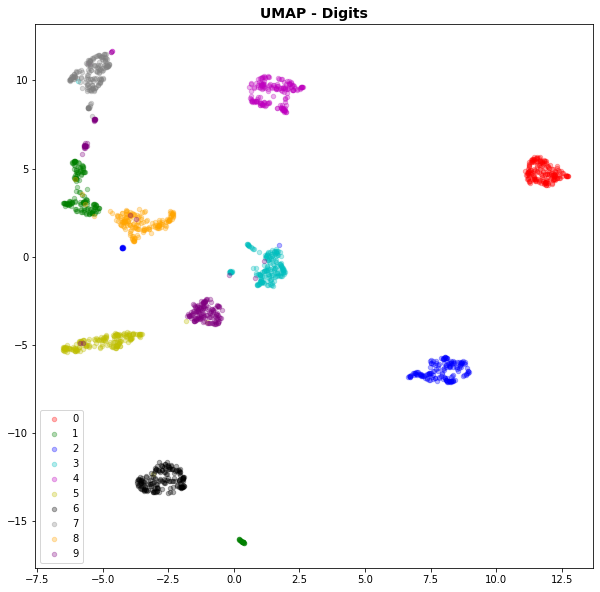

In [19]:
import umap
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits()
y = digits.target
reducer = umap.UMAP(random_state=42)
X = reducer.fit_transform(digits.data)


print (X.shape)

plt.figure(figsize=(10, 10))
target_ids = range(len(digits.target_names))
colors = ('r', 'g', 'b', 'c', 'm', 'y', 'k', 'grey', 'orange', 'purple')

for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=c, label=label, s=20, alpha=0.3)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('UMAP - Digits', weight='bold').set_fontsize('14')

plt.show()
